In [2]:
import pandas as pd


df = pd.read_csv('ds80.txt', sep='\t')
x_values = df.iloc[:, 0].tolist()
y_values = df.iloc[:, 1].tolist()
left_error = df.iloc[:, 2].tolist()
right_error = df.iloc[:, 3].tolist()

$m(E) = A \cdot E^{\alpha}\cdot exp(-\frac{\beta}{E^{\delta}})$

In [6]:
def func(E, a, alpha, beta, delta):
    return  a * (E ** alpha) * np.exp(-beta / E**delta)

Оптимальные параметры: [1.61528174e-02 7.89383031e-01 1.59418271e+02 9.27996734e-01]
Ковариационная матрица: [[ 2.66678414e-07 -1.64552643e-06 -9.02419229e-03 -1.13151990e-05]
 [-1.64552643e-06  1.01636568e-05  5.50358300e-02  6.91632475e-05]
 [-9.02419229e-03  5.50358300e-02  3.65188065e+02  4.40169506e-01]
 [-1.13151990e-05  6.91632475e-05  4.40169506e-01  5.35658724e-04]]


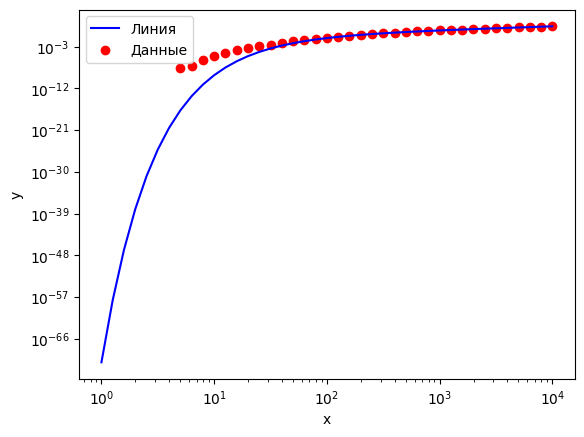

In [21]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

xdata = np.array(x_values)
ydata = np.array(y_values)
popt, pcov = curve_fit(func, xdata, ydata, maxfev=10000)
plt.loglog(xdata, func(xdata, *popt), 'b-', label='Линия')
plt.scatter(xdata, ydata, color='red', label='Данные')
print("Оптимальные параметры:", popt)
print("Ковариационная матрица:", pcov)
plt.xlabel('x')
plt.ylabel('y')

plt.legend()

plt.show()

41 41
Оптимальные параметры: [3.33113478e-02 7.17754265e-01 5.45137460e+01 6.80407593e-01]
Ковариационная матрица: [[ 6.23891834e-06 -1.88053816e-05 -4.97785082e-03 -2.90446096e-05]
 [-1.88053816e-05  5.68024632e-05  1.47826456e-02  8.66804522e-05]
 [-4.97785082e-03  1.47826456e-02  4.78131678e+00  2.60383121e-02]
 [-2.90446096e-05  8.66804522e-05  2.60383121e-02  1.45576511e-04]]
[3.33113478e-02 7.17754265e-01 5.45137460e+01 6.80407593e-01]
[[ 6.23891834e-06 -1.88053816e-05 -4.97785082e-03 -2.90446096e-05]
 [-1.88053816e-05  5.68024632e-05  1.47826456e-02  8.66804522e-05]
 [-4.97785082e-03  1.47826456e-02  4.78131678e+00  2.60383121e-02]
 [-2.90446096e-05  8.66804522e-05  2.60383121e-02  1.45576511e-04]]
Стандартные ошибки параметров: [0.00249778 0.00753674 2.18662223 0.01206551]


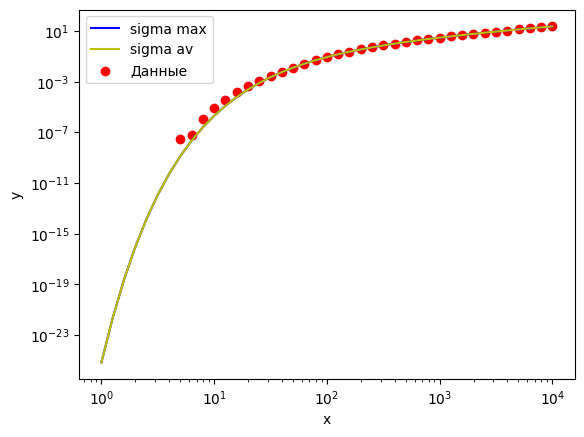

In [26]:
import random
import numpy as np



xdata = np.array(x_values)
ydata = np.array(y_values)
#sigma = np.array([np.sqrt(left_error[i] ** 2 + left_error[i] ** 2) for i in range(0, len(left_error))])
sigma_av = np.array([(right_error[i] + left_error[i] ) / 2 for i in range(0, len(left_error))])
sigma_max = np.array([max(right_error[i], left_error[i] ) for i in range(0, len(left_error))])
print(len(xdata), len(sigma))

popt1, pcov1 = curve_fit(func, xdata, ydata, p0 =(0.1, 0.2, 2, 3), sigma=sigma_max, maxfev=10000)
popt2, pcov2 = curve_fit(func, xdata, ydata, p0 =(0.1, 0.2, 2, 3), sigma=sigma_av, maxfev=10000)


print("Оптимальные параметры:", popt)
print("Ковариационная матрица:", pcov)
plt.loglog(xdata, func(xdata, *popt1), 'b-', label='sigma max')
plt.loglog(xdata, func(xdata, *popt2), 'y-', label='sigma av')
plt.scatter(xdata, ydata, color='red', label='Данные')
plt.xlabel('x')
print(popt)
print(pcov)
plt.ylabel('y')
standard_errors = np.sqrt(np.diag(pcov))
print("Стандартные ошибки параметров:", standard_errors)
plt.legend()


41 41
Оптимальные параметры: [ 0.04827202  0.68154589 45.          0.62185907]
Ковариационная матрица: [3.33113478e-02 7.17754265e-01 5.45137460e+01 6.80407593e-01]
[3.33113478e-02 7.17754265e-01 5.45137460e+01 6.80407593e-01]
[[ 6.23891834e-06 -1.88053816e-05 -4.97785082e-03 -2.90446096e-05]
 [-1.88053816e-05  5.68024632e-05  1.47826456e-02  8.66804522e-05]
 [-4.97785082e-03  1.47826456e-02  4.78131678e+00  2.60383121e-02]
 [-2.90446096e-05  8.66804522e-05  2.60383121e-02  1.45576511e-04]]
Стандартные ошибки параметров: [0.00249778 0.00753674 2.18662223 0.01206551]


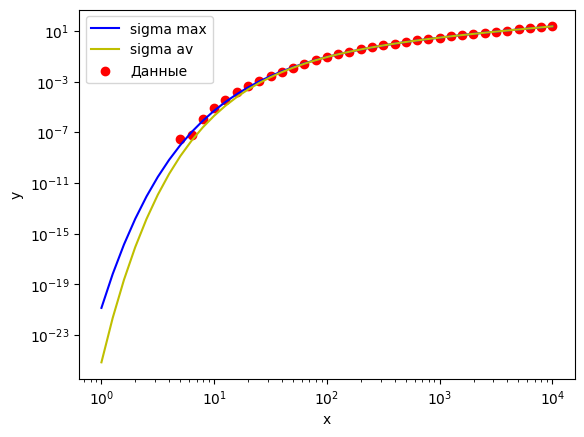

In [36]:
import random
import numpy as np



xdata = np.array(x_values)
ydata = np.array(y_values)
#sigma = np.array([np.sqrt(left_error[i] ** 2 + left_error[i] ** 2) for i in range(0, len(left_error))])
sigma_av = np.array([(right_error[i] + left_error[i] ) / 2 for i in range(0, len(left_error))])
sigma_max = np.array([max(right_error[i], left_error[i] ) for i in range(0, len(left_error))])
print(len(xdata), len(sigma))

popt1, pcov1 = curve_fit(func, xdata, ydata, p0 =(0.1, 0.2, 2, 3), sigma=sigma_max, bounds=(0,45), maxfev=10000)
popt2, pcov2 = curve_fit(func, xdata, ydata, p0 =(0.1, 0.2, 2, 3), sigma=sigma_max, maxfev=10000)


print("Оптимальные параметры:", popt1)
print("Ковариационная матрица:", popt2)
plt.loglog(xdata, func(xdata, *popt1), 'b-', label='sigma max')
plt.loglog(xdata, func(xdata, *popt2), 'y-', label='sigma av')
plt.scatter(xdata, ydata, color='red', label='Данные')
plt.xlabel('x')
print(popt)
print(pcov)
plt.ylabel('y')
standard_errors = np.sqrt(np.diag(pcov))
print("Стандартные ошибки параметров:", standard_errors)
plt.legend()
